<a href="https://colab.research.google.com/github/sashakote123/MachineLearningCource/blob/main/PredictionWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Weather Training Data.csv to Weather Training Data.csv


In [4]:
import io
data_raw = pd.read_csv(io.BytesIO(uploaded['Weather Training Data.csv']))

In [5]:
data_raw = data_raw.drop(axis=1, labels='row ID')
data_raw.shape


(99516, 22)

In [6]:
data_raw.head(15)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
5,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0
6,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,ESE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,1
7,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,ENE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1
8,Albury,12.6,21.0,3.6,NaN,NaN,SW,44.0,W,SSW,...,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,0
9,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,...,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,0


In [7]:
#replacement_dict = {'Yes': 1, 'No': 0, 'NaN': None}
#data_raw['RainToday'] = data_raw['RainToday'].replace(replacement_dict)
#data_raw['RainTomorrow'] = data_raw['RainTomorrow'].replace(replacement_dict)


In [8]:
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MinTemp        99073 non-null  float64
 2   MaxTemp        99286 non-null  float64
 3   Rainfall       98537 non-null  float64
 4   Evaporation    56985 non-null  float64
 5   Sunshine       52199 non-null  float64
 6   WindGustDir    92995 non-null  object 
 7   WindGustSpeed  93036 non-null  float64
 8   WindDir9am     92510 non-null  object 
 9   WindDir3pm     96868 non-null  object 
 10  WindSpeed9am   98581 non-null  float64
 11  WindSpeed3pm   97681 non-null  float64
 12  Humidity9am    98283 non-null  float64
 13  Humidity3pm    97010 non-null  float64
 14  Pressure9am    89768 non-null  float64
 15  Pressure3pm    89780 non-null  float64
 16  Cloud9am       61944 non-null  float64
 17  Cloud3pm       59514 non-null  float64
 18  Temp9a

In [9]:
data_raw["RainToday"] = data_raw["RainToday"].astype('category')
data_raw["RainTomorrow"] = data_raw["RainTomorrow"].astype('category')
data_raw["Location"] = data_raw["Location"].astype('category')
data_raw["WindGustDir"] = data_raw["WindGustDir"].astype('category')
data_raw["WindDir9am"] = data_raw["WindDir9am"].astype('category')
data_raw["WindDir3pm"] = data_raw["WindDir3pm"].astype('category')

In [10]:
data_raw.describe(include=['category'])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,99516,92995,92510,96868,98537,99516
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,0
freq,2393,6843,8052,7410,76481,77157


In [11]:
data_raw.describe(include=['float64'])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


Разберем названия всех параметров:\
Location - локация\
MinTemp - минимальная температура (в цельсиях)\
MaxTemp - максимальная температура (в цельсиях)\
Rainfall - Количество осадков, выпавших за сутки (в мм)\
Evaporation - Испарения \
Sunshine - Яркое солнце в определенный день. (часы)\
WindGustDir - Направление самого сильного порыва в течение определенного дня. \
WindGustSpeed - Скорость сильнейшего порыва в течение определенного дня. (километров в час)\
WindDir9am - Направление ветра за 10 минут до 9 часов утра. (точки компаса)\
WindDir3pm - Направление ветра за 10 минут до 3 часов дня. (точки компаса)\   
WindSpeed9am - Скорость ветра за 10 минут до 9 часов утра.\
WindSpeed3pm - Скорость ветра за 10 минут до 3 часов дня.\
Humidity9am - Влажность за 10 минут до 9 часов утра.\
Humidity3pm - Влажность за 10 минут до 3 часов дня.\
Pressure9am - Давление за 10 минут до 9 часов утра.\
Pressure3pm - Давление за 10 минут до 3 часов дня.\
Cloud9am - Облачность за 10 минут до 9 часов утра.\  
Cloud3pm - Облачность за 10 минут до 3 часов дня.\    
Temp9am - Температура за 10 минут до 9 часов утра.\      
Temp3pm - Температура за 10 минут до 3 часов дня.\      
RainToday - был ли дождь сегодня\    
RainTomorrow - прогноз, будет ли дождь завтра



Посчитаем процент пропущеных значений (9,67%)

In [12]:
data_raw.isnull().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

Определим баланс классов

In [13]:
data_raw['RainTomorrow'].value_counts()

0    77157
1    22359
Name: RainTomorrow, dtype: int64

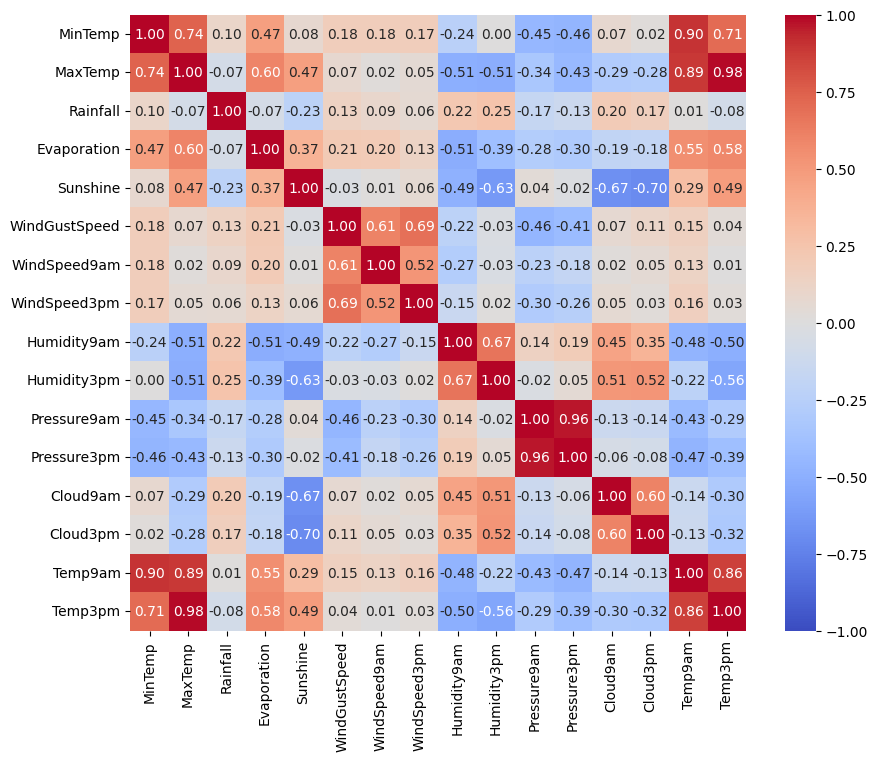

In [14]:
corr_mat = data_raw.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', ax=ax)
pass

Несколько графиков

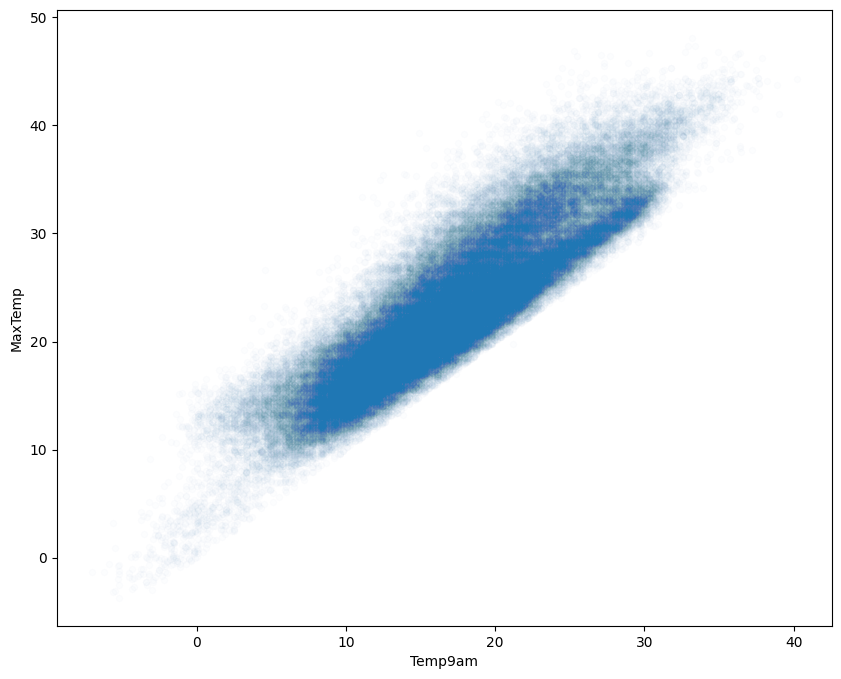

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
data_raw.plot(kind = 'scatter', x = 'Temp9am', y = 'MaxTemp', alpha=.01, ax=ax)
pass

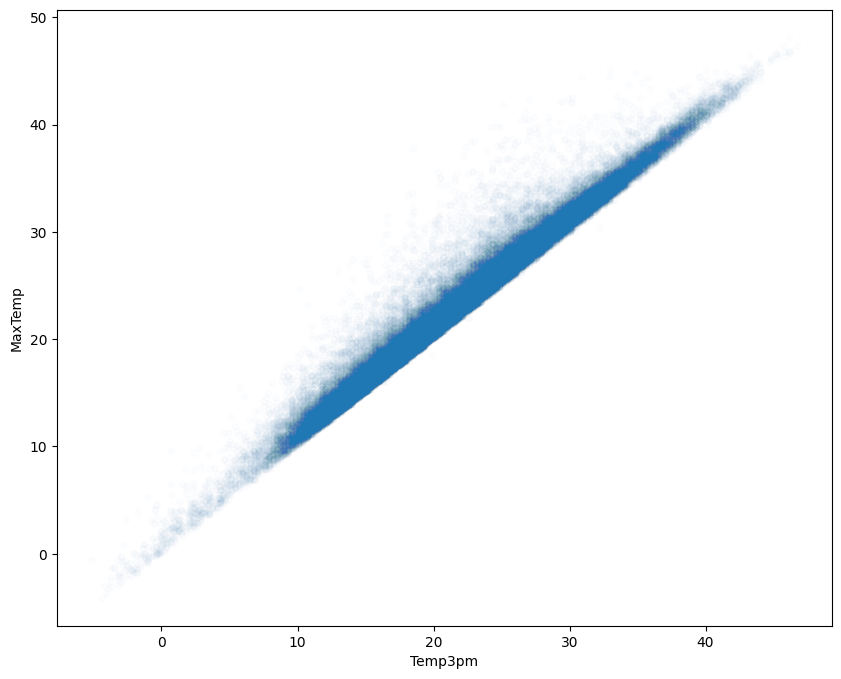

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
data_raw.plot(kind = 'scatter', x = 'Temp3pm', y = 'MaxTemp', alpha=.01, ax=ax)
pass

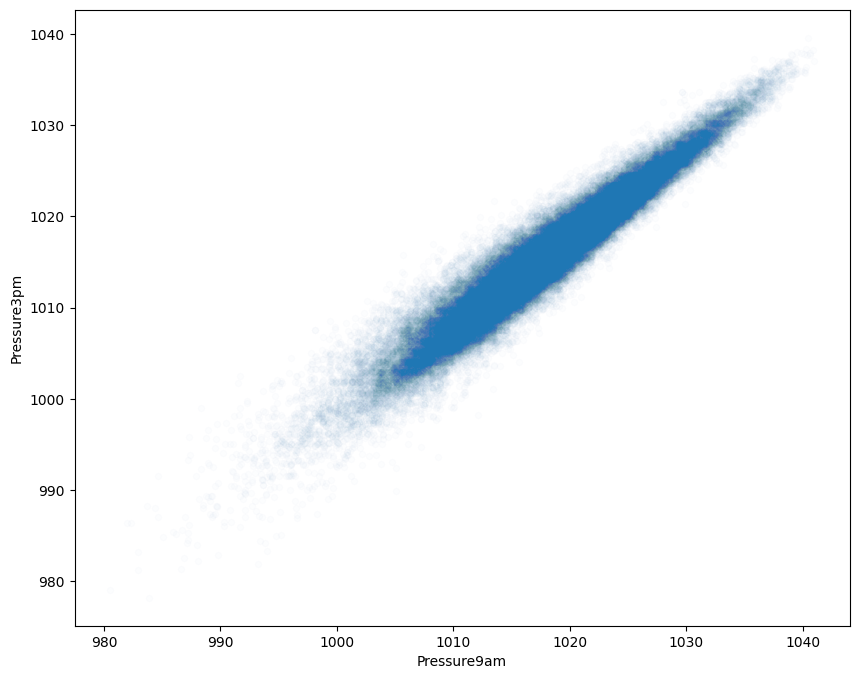

In [17]:

fig, ax = plt.subplots(figsize=(10, 8))
data_raw.plot(kind = 'scatter', x = 'Pressure9am', y = 'Pressure3pm', alpha=.01, ax=ax)
pass

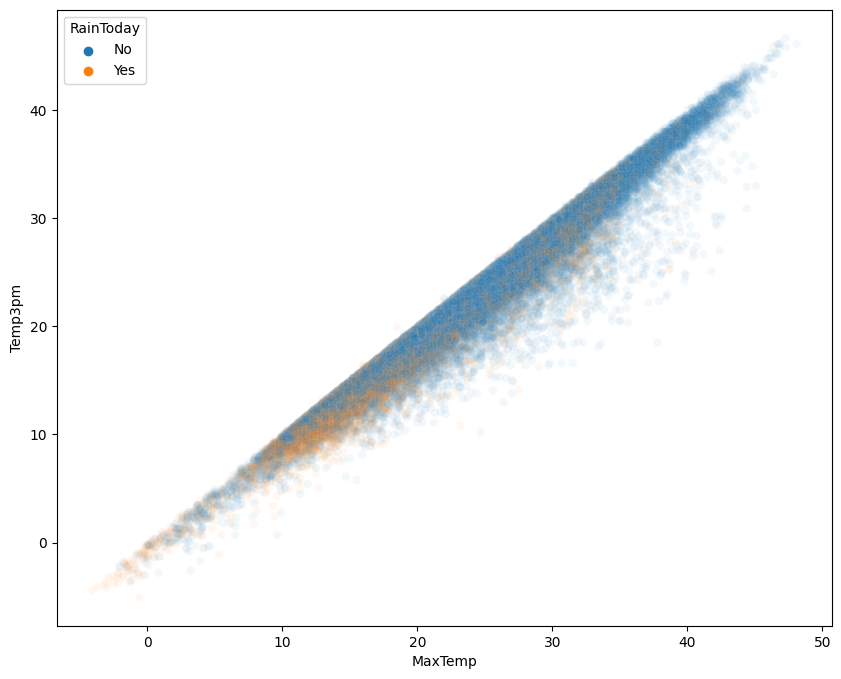

In [18]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'MaxTemp', y = 'Temp3pm', hue='RainToday', data=data_raw, alpha=0.05)
pass

## Обучающая и тестовая выборки

In [19]:
uploaded2 = files.upload()


Saving Weather Test Data.csv to Weather Test Data.csv


In [20]:
data_raw2 = pd.read_csv(io.BytesIO(uploaded2['Weather Test Data.csv']))

In [21]:
X_train = data_raw.drop(labels=['RainTomorrow', 'Location'], axis=1)
y_train = data_raw['RainTomorrow']


X_test = data_raw2.drop(labels=['row ID', 'Location'], axis=1)


In [22]:
X_test.shape

(42677, 20)

## Заполним числовые пропущенные значения медианой, а текстовые модой

In [23]:
X_train.isna().sum()

MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
dtype: int64

In [24]:

mode_value = X_train['WindGustDir'].mode()[0]
X_train['WindGustDir'].fillna(mode_value, inplace=True)
mode_value = X_train['WindDir9am'].mode()[0]
X_train['WindDir9am'].fillna(mode_value, inplace=True)
mode_value = X_train['WindDir3pm'].mode()[0]
X_train['WindDir3pm'].fillna(mode_value, inplace=True)
mode_value = X_train['RainToday'].mode()[0]
X_train['RainToday'].fillna(mode_value, inplace=True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']] = imputer.fit_transform(X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])



In [25]:
mode_value = X_test['WindGustDir'].mode()[0]
X_test['WindGustDir'].fillna(mode_value, inplace=True)
mode_value = X_test['WindDir9am'].mode()[0]
X_test['WindDir9am'].fillna(mode_value, inplace=True)
mode_value = X_test['WindDir3pm'].mode()[0]
X_test['WindDir3pm'].fillna(mode_value, inplace=True)
mode_value = X_test['RainToday'].mode()[0]
X_test['RainToday'].fillna(mode_value, inplace=True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']] = imputer.fit_transform(X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']])

In [26]:
X_test.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

##Бинаризация номинальных признаков
признак RainToday заменим бинарным
признаки WindGustDir, WindDir9am,	WindDir3pm бинаризуем

In [27]:
replacement_dict = {'Yes': 1, 'No': 0}
X_train['RainToday'] = X_train['RainToday'].replace(replacement_dict)

replacement_dict = {'Yes': 1, 'No': 0}
X_test['RainToday'] = X_test['RainToday'].replace(replacement_dict)

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_train[['WindGustDir', 'WindDir9am',	'WindDir3pm']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_test[['WindGustDir', 'WindDir9am',	'WindDir3pm']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [30]:
dummies = pd.DataFrame(enc.transform(X_train[['WindGustDir', 'WindDir9am',	'WindDir3pm']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)

In [31]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['WindGustDir', 'WindDir9am',	'WindDir3pm'], axis=1)

In [32]:
dummies = pd.DataFrame(enc.transform(X_test[['WindGustDir', 'WindDir9am',	'WindDir3pm']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)

In [33]:
X_test = pd.concat((X_test, dummies), axis=1).drop(['WindGustDir', 'WindDir9am',	'WindDir3pm'], axis=1)

In [34]:
X_train.shape

(99516, 65)

In [35]:
X_test.shape

(42677, 65)

In [36]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.3,25.0,0.0,4.8,8.5,50.0,20.0,24.0,49.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,9.7,31.9,0.0,4.8,8.5,80.0,7.0,28.0,42.0,9.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.9,18.6,15.6,4.8,8.5,61.0,28.0,28.0,76.0,93.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Нормализация признаков
В данной задаче в нормализации нет необходимости, так как значения в столбцах находятся в пределах одного порядка





##Обучаем модель
#Метод ближайшего соседа

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_train_predict_KNN = knn_classifier.predict(X_train)
y_test_predict_KNN  = knn_classifier.predict(X_test)

#Метод - линейный дискриминантный анализ

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_train_predict_LDA = lda.predict(X_train)
y_test_predict_LDA = lda.predict(X_test)


#Метод - квадратичный дискриминантный анализ

In [85]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(priors=[0.8, 0.2], tol=1e-4)
qda.fit(X_train, y_train)
y_train_predict_QDA = qda.predict(X_train)
y_test_predict_QDA = qda.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


В выбранном мной датасете отстутствует колонка с y_test с данными о погоде на тестовой выборке, поэтому ошибку на тестовой выборке посчитать не получится

#Ошибки на обучающей выборке
Ошибки будем оценивать тремя метриками производимости: accuracy, precision, recal
Accuracy - измеряет общую точность классификатора\
Формула: Accuracy = $\frac{TruePositives}{AllPredictions}$\
Precision - измеряет, как много из предсказанных точек являются положительными, т.е. на сколько точно модель идентифицирует положительные случаи.\
Формула: Precision = $\frac{TruePositives}{TruePositives+FalsePositives}$\
Recall - измеряет способности модели обнаруживать все положительные экземпляры в данных\
Формула: Recall = $\frac{TruePositives}{TruePositives+FalseNegative}$

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_train_KNN = accuracy_score(y_train, y_train_predict_KNN)
precision_train_KNN = precision_score(y_train, y_train_predict_KNN)
recall_train_KNN = recall_score(y_train, y_train_predict_KNN)

accuracy_train_LDA = accuracy_score(y_train, y_train_predict_LDA)
precision_train_LDA = precision_score(y_train, y_train_predict_LDA)
recall_train_LDA = recall_score(y_train, y_train_predict_LDA)

accuracy_train_QDA = accuracy_score(y_train, y_train_predict_QDA)
precision_train_QDA = precision_score(y_train, y_train_predict_QDA)
recall_train_QDA = recall_score(y_train, y_train_predict_QDA)

print(f'Точность (Accuracy) kNN {accuracy_train_KNN}')
print(f'Точность (Precision) kNN {precision_train_KNN}')
print(f'Полнота (Recall) kNN {recall_train_KNN}')
print()
print(f'Точность (Accuracy) LDA {accuracy_train_LDA}')
print(f'Точность (Precision) LDA {precision_train_LDA}')
print(f'Полнота (Recall) LDA {recall_train_LDA}')
print()
print(f'Точность (Accuracy) QDA {accuracy_train_QDA}')
print(f'Точность (Precision) QDA {precision_train_QDA}')
print(f'Полнота (Recall) QDA {recall_train_QDA}')

Точность (Accuracy) kNN 0.8952932191808353
Точность (Precision) kNN 0.8252956242166639
Полнота (Recall) kNN 0.677355874591887

Точность (Accuracy) LDA 0.8422866674705575
Точность (Precision) LDA 0.7078343313373253
Полнота (Recall) LDA 0.507536115210877

Точность (Accuracy) QDA 0.36902608625748623
Точность (Precision) QDA 0.2514476806373483
Полнота (Recall) QDA 0.9147099601949997


Видим, что метод квадратичной дискриминации дал слишком маленькую точность, связано это с тем, что в наборе данных очень много "коллинеарных" признаков, т.е. сильно коррелированных признаков. Это привело к численной неустойчивости.\
Остальные методы дали нормальную точность, правильный подбор параметров может увеличить точность ещё больше.

#Вывод
Полученная модель может предугадать (с установившейся точностью), при заданных параметрах окружающей среды, будет ли дождь на следующий день